In [40]:
# set up imports
import pandas as pd, numpy as np, seaborn as sns
from tabulate import tabulate
import statsmodels
import arch
import matplotlib
matplotlib.use('qt5agg')

# configure plot style
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["figure.figsize"] = (7,2.75)
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['lines.linewidth'] = 0.8
save_plot_to =  r'C:\\Users\joche\OneDrive\03 TUM - TUM-BWL\Semester 8\01 Bachelorarbeit\04 Results\Plots/'

In [18]:
# load data from excel file
mydateparser = lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
btc = pd.read_excel('Data/BTC_closing.xlsx',squeeze=True, parse_dates=[0], index_col=0, date_parser=mydateparser)

# crop data: 2015-08-07 to 2020-06-26
start_date = '2015-08-07'
end_date = '2020-06-26'
btc = btc[start_date : end_date]

In [72]:
# fig1: btc neben btc_log
btc_log = np.log(btc)
fig_1, axes = plt.subplots(1,2, sharex=True)
axes[0].plot(btc)
axes[0].set_title('btc')
axes[1].plot(btc_log)
axes[1].set_title('btc_log')

Text(0.5, 1.0, 'btc_log')

In [67]:
# ADF- and PP- mit btc_log
from arch.unitroot import ADF, PhillipsPerron
adf = ADF(btc_log)
pp = PhillipsPerron(btc_log)
print(adf.summary().as_text(),'\n\n\n', pp.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.500
P-value                         0.533
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 


      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.492
P-value                         0.537
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [66]:
# Differenzenbildung: btc_log -> btc_log_diff1
# ADF- and PP- mit btc_log_diff1
from arch.unitroot import ADF, PhillipsPerron
btc_log_diff1 = btc_log.diff().dropna()
adf = ADF(btc_log_diff1)
pp = PhillipsPerron(btc_log_diff1)
print(adf.summary().as_text(),'\n\n\n', pp.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                -43.373
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 


      Phillips-Perron Test (Z-tau)    
Test Statistic                -43.453
P-value                         0.000
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


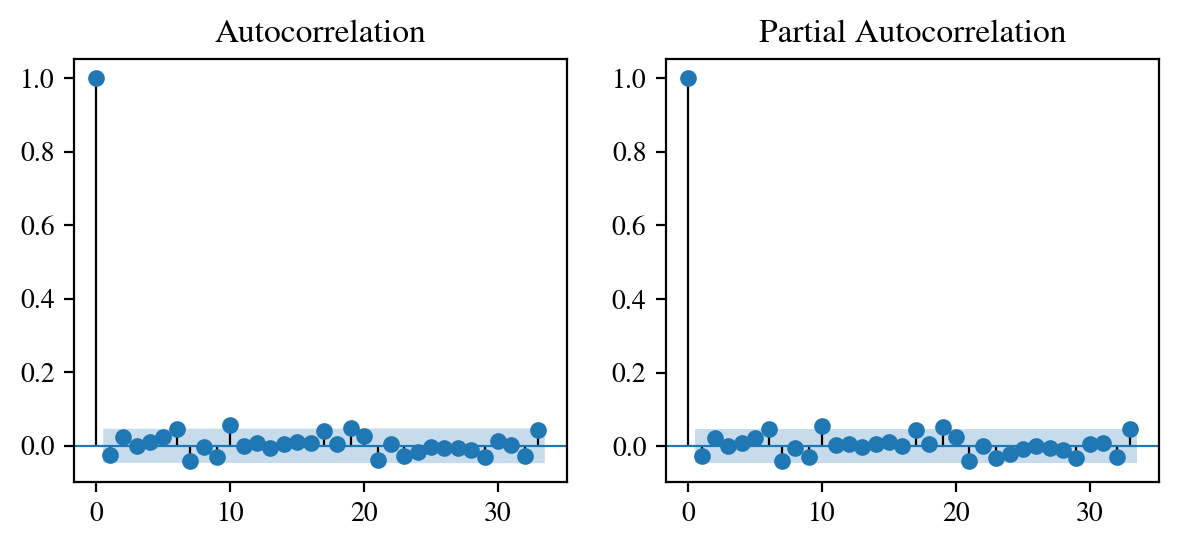

In [73]:
# ACF und PACF plot für btc_log_diff1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_2, axes = plt.subplots(1,2)
plot_acf(btc_log_diff1, ax=axes[0])
plot_pacf(btc_log_diff1, ax=axes[1])

In [86]:
# AIC, BIC und HQIC für Order p und q
from statsmodels.tsa.arima_model import ARIMA
arima_0_1_0 = ARIMA(btc_log, order=(0,1,0))
r_arima_0_1_0 = arima_0_1_0.fit()
print(r_arima_0_1_0.summary().as_latex())





\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:} &     D.Close      & \textbf{  No. Observations:  } &    1785     \\
\textbf{Model:}         &  ARIMA(0, 1, 0)  & \textbf{  Log Likelihood     } &  3201.600   \\
\textbf{Method:}        &       css        & \textbf{  S.D. of innovations} &   0.040     \\
\textbf{Date:}          & Wed, 26 Aug 2020 & \textbf{  AIC                } & -6399.201   \\
\textbf{Time:}          &     19:19:39     & \textbf{  BIC                } & -6388.227   \\
\textbf{Sample:}        &    08-08-2015    & \textbf{  HQIC               } & -6395.148   \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
               & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const} &       0.0020  &        0.001     &     2.052  &         0.040        &     8.76e-05    &        0.004     \\
\bottomrule
\end{tabular}
%\caption{ARIMA Model Results}
\end{center}


C:\Users\joche\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\joche\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
